In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
cd /content/drive/MyDrive/FAKENEWS_RESULTS

/content/drive/MyDrive/FAKENEWS_RESULTS


# **Parameters Setting**

In [53]:
max_len = 500
latent_dim = 15
manifold_dim = 10
epochs = 100

In [54]:
from importlib import reload
import sys
import pandas as pd
import numpy as np
from imp import reload
import warnings
warnings.filterwarnings('ignore')
if sys.version[0] == '2':
    reload(sys)
    sys.setdefaultencoding("utf-8")

In [55]:
true = pd.read_csv('True.csv')
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [56]:
fake = pd.read_csv('Fake.csv')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [57]:
true['truth'] = 1
fake['truth'] = 0
df = pd.concat([true, fake], axis=0, ignore_index=True)
df.shape

(44898, 5)

In [58]:
df = df.dropna()
df.shape

(44898, 5)

In [59]:
df

,title,text,subject,date,truth
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [60]:
df['truth'].value_counts()


truth
0    23481
1    21417
Name: count, dtype: int64

# **Text Preprocessing**

In [61]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def clean_text(txt):

    contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
    def _get_contractions(contraction_dict):
        contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
        return contraction_dict, contraction_re

    def replace_contractions(text):
        contractions, contractions_re = _get_contractions(contraction_dict)
        def replace(match):
            return contractions[match.group(0)]
        return contractions_re.sub(replace, text)

    # replace contractions
    txt = replace_contractions(txt)

    #remove punctuations
    txt  = "".join([char for char in txt if char not in string.punctuation])
    txt = re.sub('[0-9]+', '', txt)

    # split into words
    words = word_tokenize(txt)

    # remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]

    # removing leftover punctuations
    words = [word for word in words if word.isalpha()]

    cleaned_text = ' '.join(words)
    return cleaned_text

df['data_cleaned'] = df['title'].apply(lambda txt: clean_text(txt))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [62]:
df.head()

,title,text,subject,date,truth,data_cleaned
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,As US budget fight looms Republicans flip fisc...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,US military accept transgender recruits Monday...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,Senior US Republican senator Let Mr Mueller job
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,FBI Russia probe helped Australian diplomat ti...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,Trump wants Postal Service charge much Amazon ...


In [63]:
from sklearn.model_selection import train_test_split

xtrain, xtest, y_train, y_test = train_test_split(df['data_cleaned'], df['truth'], shuffle=True, test_size=0.2)
# find the length of the largest sentence in training data
max_len = xtrain.apply(lambda x: len(x)).max()
print(f'Max number of words in a text in training data: {max_len}')

Max number of words in a text in training data: 227


# **Text Embedding**

In [64]:
from tensorflow.keras.preprocessing import text, sequence

max_words = 10000
tokenizer = text.Tokenizer(num_words = max_words)
# create the vocabulary by fitting on x_train text
tokenizer.fit_on_texts(xtrain)
# generate the sequence of tokens
xtrain_seq = tokenizer.texts_to_sequences(xtrain)
xtest_seq = tokenizer.texts_to_sequences(xtest)

# pad the sequences
x_train = sequence.pad_sequences(xtrain_seq, maxlen=max_len)
x_test = sequence.pad_sequences(xtest_seq, maxlen=max_len)
word_index = tokenizer.word_index


In [65]:
embedding_vectors = {}
with open('/content/drive/MyDrive/glove.6B.300d.txt','r',encoding='utf-8') as file:
    for row in file:
        values = row.split(' ')
        word = values[0]
        weights = np.asarray([float(val) for val in values[1:]])
        embedding_vectors[word] = weights
print(f"Size of vocabulary in GloVe: {len(embedding_vectors)}")


#initialize the embedding_matrix with zeros
emb_dim = 300
if max_words is not None:
    vocab_len = max_words
else:
    vocab_len = len(word_index)+1
embedding_matrix = np.zeros((vocab_len, emb_dim))
oov_count = 0
oov_words = []
for word, idx in word_index.items():
    if idx < vocab_len:
        embedding_vector = embedding_vectors.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector
        else:
            oov_count += 1
            oov_words.append(word)
#print some of the out of vocabulary words
print(f'Some out of valubulary words: {oov_words[0:5]}')

Size of vocabulary in GloVe: 400000
Some out of valubulary words: ['brexit', 'antitrump', 'antifa', 'zimbabwes', 'reutersipsos']


In [66]:
!pip install keras-self-attention

# **Global Dimention Reduction with Trasformers**

In [67]:
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D,LayerNormalization
from keras import initializers, regularizers, constraints, optimizers, layers
import keras
from keras_self_attention  import SeqSelfAttention # Self attention
latent_dim = 30

input = Input(shape=(max_len,))
x = Embedding(vocab_len, emb_dim, trainable = False, weights=[embedding_matrix])(input)
x = Bidirectional(LSTM(128, return_sequences = True))(x)
x = SeqSelfAttention(units = 128, attention_width= 10,
                           attention_type = SeqSelfAttention.ATTENTION_TYPE_MUL,
                           return_attention = False,
                           kernel_initializer = 'glorot_normal', bias_initializer= 'zeros',
                           kernel_regularizer = None, bias_regularizer = None,
                           kernel_constraint= None, bias_constraint= None,
                           use_additive_bias= True,
                           use_attention_bias = True, attention_activation = 'relu',
                           attention_regularizer_weight = 0)(x)
x = GlobalMaxPool1D()(x)
x = Dense(latent_dim, activation="relu")(x)
bottleneck = Dropout(0.2)(x)
output = Dense(1, activation="sigmoid")(bottleneck)

model = keras.Model(inputs=input, outputs=output)
encoder = Model(inputs = model.input, outputs = bottleneck)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
callback = keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)
model.summary()
history = model.fit(x_train,y_train, batch_size=max_len, epochs=100, validation_split=0.2,callbacks = [callback])

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 227)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 227, 300)          3000000   
                                                                 
 bidirectional_2 (Bidirecti  (None, 227, 256)          439296    
 onal)                                                           
                                                                 
 seq_self_attention_2 (SeqS  (None, 227, 256)          65537     
 elfAttention)                                                   
                                                                 
 global_max_pooling1d_2 (Gl  (None, 256)               0         
 obalMaxPooling1D)                                               
                                                           

# **Summary of deep model (Trainable and NonTrainable parameters**

In [68]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 227)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 227, 300)          3000000   
                                                                 
 bidirectional_2 (Bidirecti  (None, 227, 256)          439296    
 onal)                                                           
                                                                 
 seq_self_attention_2 (SeqS  (None, 227, 256)          65537     
 elfAttention)                                                   
                                                                 
 global_max_pooling1d_2 (Gl  (None, 256)               0         
 obalMaxPooling1D)                                               
                                                           

# **Convergence behavir of the Encoder-Decoder model**

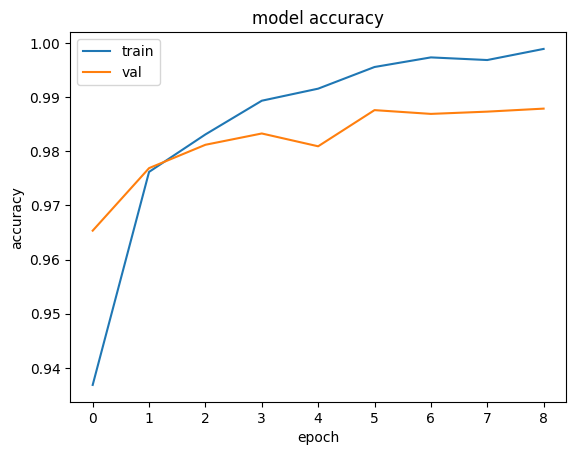

In [69]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

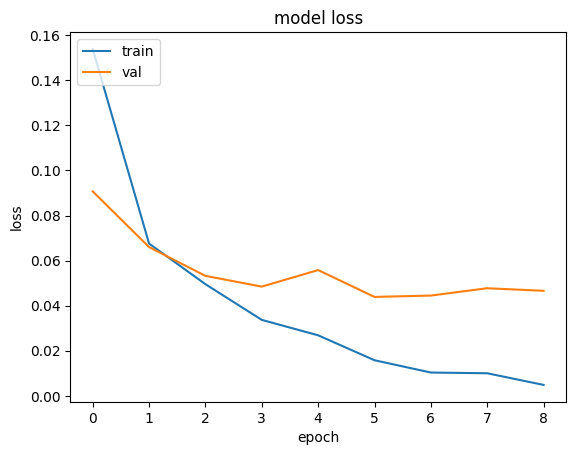

In [70]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# **Plot the structure of the encoder model**

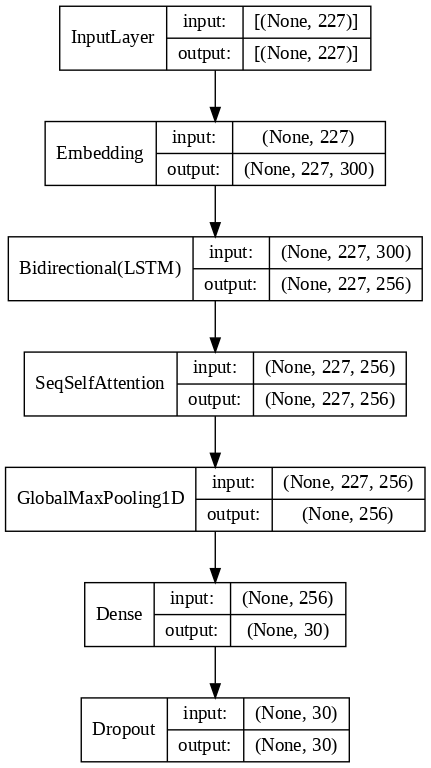

In [71]:
keras.utils.plot_model(
    encoder,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir="TB",
    expand_nested=False,
    dpi=100,
    show_layer_activations=False,
    show_trainable=False,
)

In [72]:
x_encoded_train = encoder.predict(x_train)
x_encoded_test = encoder.predict(x_test)
print(x_encoded_train.shape, x_encoded_test.shape)

281/281 [==============================] - 3s 9ms/step
(35918, 30) (8980, 30)


In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
 f1_score, confusion_matrix, classification_report)

**SpectralEmbedding**

--------------------------Results for manifold dimention-------------------
Accuracy: 0.10311804008908686
Precision: 0.004772004241781549
Recall: 0.0041685965724872626
F1 score: 0.004449938195302843
              precision    recall  f1-score   support

           0       0.17      0.19      0.18      4662
           1       0.00      0.00      0.00      4318

    accuracy                           0.10      8980
   macro avg       0.09      0.10      0.09      8980
weighted avg       0.09      0.10      0.10      8980

--------------------------Results for 3d dimention-------------------
Accuracy: 0.07527839643652562
Precision: 0.0889026402640264
Recall: 0.0998147290412228
F1 score: 0.0940432031420467
              precision    recall  f1-score   support

           0       0.06      0.05      0.06      4662
           1       0.09      0.10      0.09      4318

    accuracy                           0.08      8980
   macro avg       0.07      0.08      0.07      8980
weighted avg    

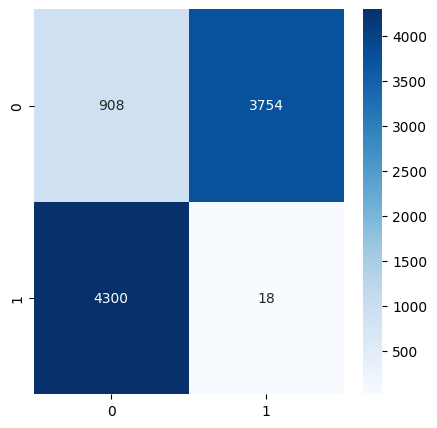

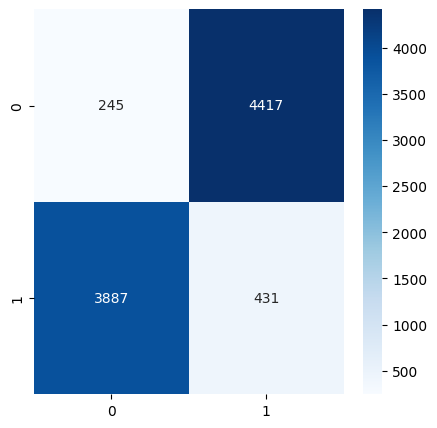

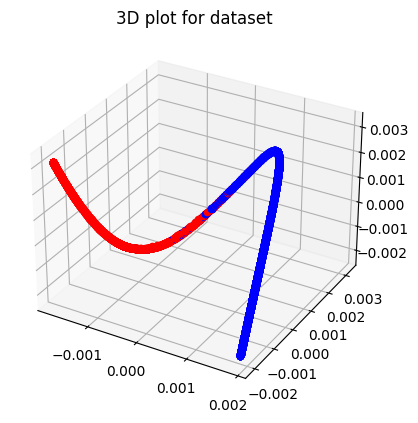

In [74]:
from sklearn.manifold import SpectralEmbedding

x_new_train = SpectralEmbedding(n_components=manifold_dim, n_neighbors=50, random_state=42).fit_transform(x_encoded_train)
x_new_test = SpectralEmbedding(n_components=manifold_dim, n_neighbors=50, random_state=42).fit_transform(x_encoded_test)

print('--------------------------Results for manifold dimention-------------------')

model = RandomForestClassifier().fit(x_new_train, y_train)
y_pred = model.predict(x_new_test)
y_pred = np.where(y_pred>0.55,1,0)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
cm = pd.DataFrame(cm , index=['0','1'] , columns=['0','1'])
plt.figure(figsize = (5,5))
sns.heatmap(cm,cmap= "Blues", linecolor='black', annot=True, fmt='')

print('--------------------------Results for 3d dimention-------------------')

x_new_train = SpectralEmbedding(n_components=3, n_neighbors=50, random_state=42).fit_transform(x_encoded_train)
x_new_test = SpectralEmbedding(n_components=3, n_neighbors=50, random_state=42).fit_transform(x_encoded_test)

model = RandomForestClassifier().fit(x_new_train, y_train)
y_pred = model.predict(x_new_test)
y_pred = np.where(y_pred>0.55,1,0)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
cm = pd.DataFrame(cm , index=['0','1'] , columns=['0','1'])
plt.figure(figsize = (5,5))
sns.heatmap(cm,cmap= "Blues", linecolor='black', annot=True, fmt='')

y_test = np.array(y_test)
fig = plt.figure()
ax = plt.axes(projection ='3d')
for i in range(len(y_test)):
    ax.scatter(x_new_test[i,0],x_new_test[i,1],x_new_test[i,2], c = 'r' if y_test[i]==1 else 'b')
    ax.plot3D(x_new_test[i,0],x_new_test[i,1],x_new_test[i,2], c = 'r' if y_test[i]==1 else 'b')
ax.set_title('3D plot for dataset')
plt.show()


# **LocallyLinearEmbedding**

In [75]:
# from sklearn.manifold import Isomap
# manifold_dim = 10
# x_new_train = Isomap(n_components = manifold_dim,
#                            metric = "euclidean",
#                            n_neighbors = 50).fit_transform(x_encoded_train)

# x_new_test = Isomap(n_components = manifold_dim,
#                            metric = "euclidean",
#                            n_neighbors = 50).fit_transform(x_encoded_test)

# print('--------------------------Results for manifold dimention-------------------')

# model = RandomForestClassifier().fit(x_new_train, y_train)
# y_pred = model.predict(x_new_test)
# y_pred = np.where(y_pred>0.55,1,0)

# print('Accuracy:', accuracy_score(y_test, y_pred))
# print('Precision:', precision_score(y_test, y_pred))
# print('Recall:', recall_score(y_test, y_pred))
# print('F1 score:', f1_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

# import seaborn as sns
# cm = confusion_matrix(y_test,y_pred)
# cm = pd.DataFrame(cm , index=['0','1'] , columns=['0','1'])
# plt.figure(figsize = (5,5))
# sns.heatmap(cm,cmap= "Blues", linecolor='black', annot=True, fmt='')

# x_new_train = Isomap(n_components = 3,
#                            metric = "euclidean",
#                            n_neighbors = 50).fit_transform(x_encoded_train)

# x_new_test = Isomap(n_components = 3,
#                            metric = "euclidean",
#                            n_neighbors = 50).fit_transform(x_encoded_test)

# print('--------------------------Results for 3d dimention -------------------')
# model = RandomForestClassifier().fit(x_new_train, y_train)
# y_pred = model.predict(x_new_test)
# y_pred = np.where(y_pred>0.55,1,0)

# print('Accuracy:', accuracy_score(y_test, y_pred))
# print('Precision:', precision_score(y_test, y_pred))
# print('Recall:', recall_score(y_test, y_pred))
# print('F1 score:', f1_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

# import seaborn as sns
# cm = confusion_matrix(y_test,y_pred)
# cm = pd.DataFrame(cm , index=['0','1'] , columns=['0','1'])
# plt.figure(figsize = (5,5))
# sns.heatmap(cm,cmap= "Blues", linecolor='black', annot=True, fmt='')
# y_test = np.array(y_test)

# fig = plt.figure()
# ax = plt.axes(projection ='3d')
# for i in range(len(y_test)):
#     ax.scatter(x_new_test[i,0],x_new_test[i,1],x_new_test[i,2], c = 'r' if y_test[i]==1 else 'b')
#     ax.plot3D(x_new_test[i,0],x_new_test[i,1],x_new_test[i,2], c = 'r' if y_test[i]==1 else 'b')
# ax.set_title('3D plot for dataset')
# plt.show()